#Support Vector Machine

A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning
model, capable of performing linear or nonlinear classification, regression, and even
outlier detection. It is one of the most popular models in Machine Learning,  SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.


The fundamental idea behind SVMs is best explained with some pictures. Figure
shows part of the iris dataset that was introduced in previous lecture. The two
classes can clearly be separated easily with a straight line (they are linearly separable).
The left plot shows the decision boundaries of three possible linear classifiers. The
model whose decision boundary is represented by the dashed line is so bad that it
does not even separate the classes properly. The other two models work perfectly on
this training set, but their decision boundaries come so close to the instances that
these models will probably not perform as well on new instances. In contrast, the
solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the
closest training instances as possible. You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) between the classes.
This is called **large margin classification**

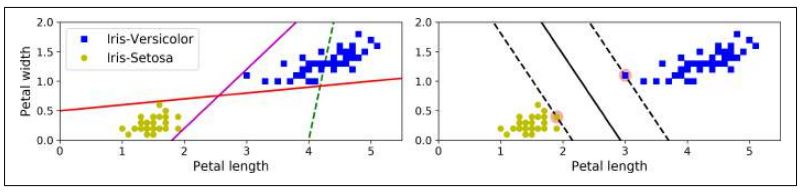

Notice that adding more training instances “off the street” will not affect the decision
boundary at all: it is fully determined (or “supported”) by the instances located on the
edge of the street. These instances are called the **support vectors** (they are circled in
Figure)

SVMs are sensitive to the feature scales, as you can see in
Figure: on the left plot, the vertical scale is much larger than the
horizontal scale, so the widest possible street is close to horizontal.
After feature scaling (e.g., using Scikit-Learn’s StandardScaler),
the decision boundary looks much better (on the right plot).

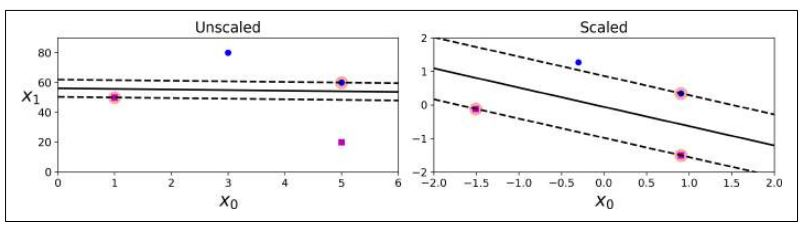

**Soft Margin Classication**

If we strictly impose that all instances be off the street and on the right side, this is
called hard margin classification. There are two main issues with hard margin classification. First, it only works if the data is linearly separable, and second it is quite sensitive to outliers. Below Figure shows the iris dataset with just one additional outlier: on
the left, it is impossible to find a hard margin, and on the right the decision boundary
ends up very different from the one we saw in previous Figure without the outlier, and it
will probably not generalize as well.




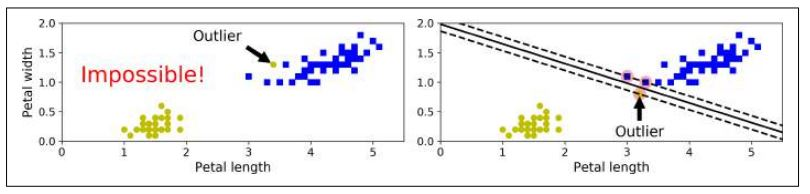

To avoid these issues it is preferable to use a more flexible model. The objective is to
find a good balance between keeping the street as large as possible and limiting the
margin violations (i.e., instances that end up in the middle of the street or even on the
wrong side). This is called soft margin classification.
In Scikit-Learn’s SVM classes, you can control this balance using the C hyperparameter: a smaller C value leads to a wider street but more margin violations. Figure shows the decision boundaries and margins of two soft margin SVM classifiers on a
nonlinearly separable dataset. On the left, using a low C value the margin is quite
large, but many instances end up on the street. On the right, using a high C value the
classifier makes fewer margin violations but ends up with a smaller margin.

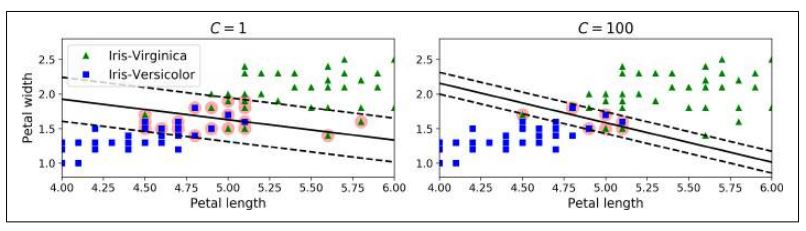

**C = 1 (Left):** The decision boundary is wider, allowing for more margin violations. This might be beneficial in cases where we want to avoid overfitting and prioritize generalization.

**C = 100 (Right):**The decision boundary is narrower, with fewer margin violations. This might be suitable when we want the model to fit the training data as closely as possible, even at the risk of overfitting.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),

 # It penalizes misclassified points  #and those within the margin. This loss function helps
 # in maximizing the margin between classes, making SVMs robust and efficient.
 ])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

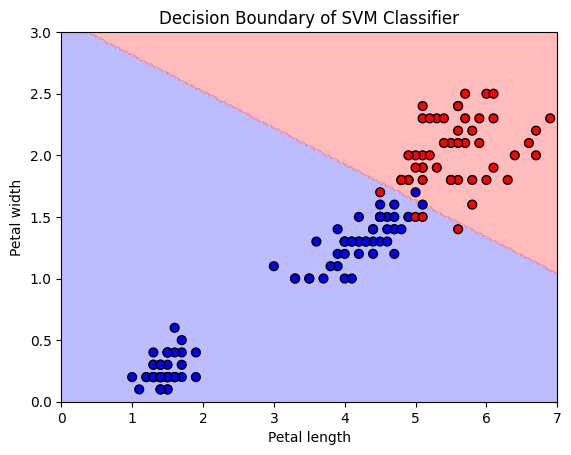

In [2]:
import matplotlib.pyplot as plt

# Plot decision boundary
def plot_decision_boundary(clf, X, y):
    x0s = np.linspace(0, 7, 200)
    x1s = np.linspace(0, 3, 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.bwr)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title("Decision Boundary of SVM Classifier")
    plt.show()

plot_decision_boundary(svm_clf, X, y)

Scikit-Learn provides **three main classes** for implementing Support Vector Machines (SVMs): SVC, LinearSVC, and SGDClassifier. Each class has its own strengths and weaknesses, making them suitable for different use cases.

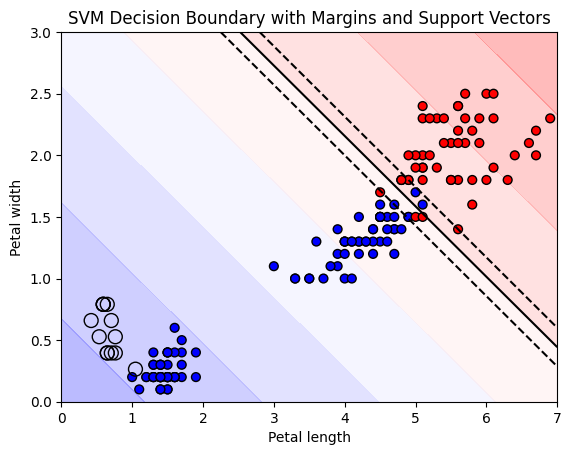

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # Import SVC instead of LinearSVC
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

# Create an SVM classifier pipeline using SVC with a linear kernel
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(kernel='linear', C=50)), # Use SVC with linear kernel
])

# Fit the model
svm_clf.fit(X, y)

# Function to plot decision boundary with support vectors and margins
def plot_svm_decision_boundary(svm_clf, X, y):
    x0s = np.linspace(0, 7, 200)
    x1s = np.linspace(0, 3, 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = svm_clf.decision_function(X_new).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.bwr)
    plt.contour(x0, x1, y_pred, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.bwr)
    plt.scatter(svm_clf.named_steps["linear_svc"].support_vectors_[:, 0],
                svm_clf.named_steps["linear_svc"].support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k')
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title("SVM Decision Boundary with Margins and Support Vectors")
    plt.show()

# Plot the decision boundary with support vectors
plot_svm_decision_boundary(svm_clf, X, y)

**Nonlinear SVM Classifcation :**

Although linear SVM classifiers are efficient and work surprisingly well in many
cases, many datasets are not even close to being linearly separable. One approach to
handling nonlinear datasets is to add more features, such as polynomial features, in some cases this can result in a linearly separable dataset.
Consider the left plot in following Figure it represents a simple dataset with just one feature
x1
. This dataset is not linearly separable, as you can see. But if you add a second feature x2
 = (x1
)
2
, the resulting 2D dataset is perfectly linearly separable

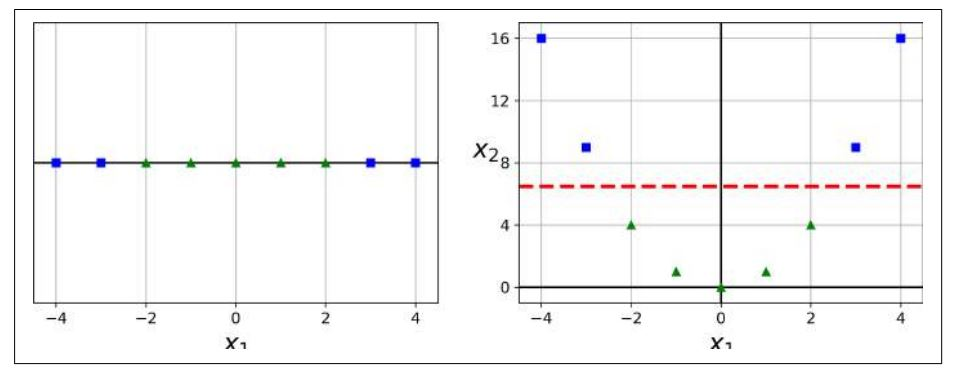

**Polynomial Kernel:**

To implement this idea using Scikit-Learn, you can create a Pipeline containing a PolynomialFeatures transformer. Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.
Fortunately, when using SVMs you can apply an almost miraculous mathematical
technique called the kernel trick (it is explained in a moment). It makes it possible to
get the same result as if you added many polynomial features, even with very high degree polynomials. This
trick is implemented by the SVC class. Let’s test it on the moons dataset:

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
 ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

This code trains an SVM classifier using a 3rd-degree polynomial kernel. It is represented on the left of Figure. On the right is another SVM classifier using a 10th degree polynomial kernel. Obviously, if model is overfitting, we might want to reduce the polynomial degree. Conversely, if it is underfitting, we can try increasing it. The hyperparameter coef0 controls how much the model is influenced by high degree polynomials versus low-degree polynomials. it ensures that the polynomial kernel can create a more flexible decision surface.

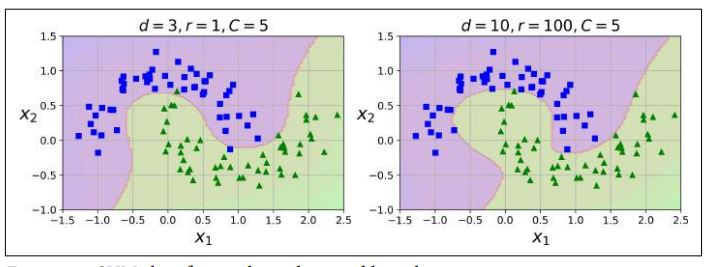

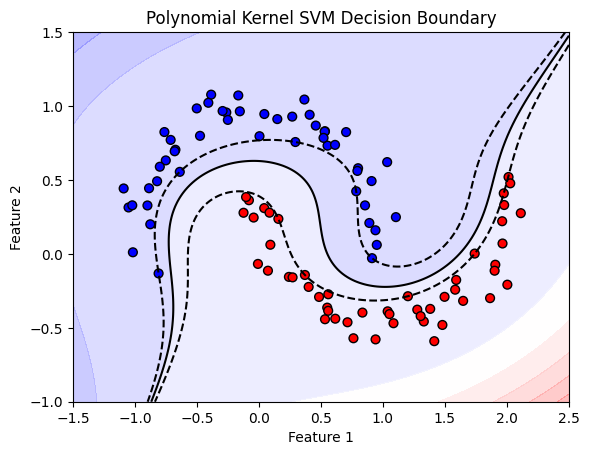

In [5]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Generate moon-shaped data
X, y = make_moons(n_samples=100, noise=0.1)

# Create and train the polynomial kernel SVM model
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=5, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

# Plot decision boundary for polynomial kernel SVM
def plot_svm_decision_boundary(clf, X, y):
    x0s = np.linspace(-1.5, 2.5, 200)
    x1s = np.linspace(-1.0, 1.5, 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.decision_function(X_new).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.bwr)
    plt.contour(x0, x1, y_pred, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.bwr)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Polynomial Kernel SVM Decision Boundary")
    plt.show()

plot_svm_decision_boundary(poly_kernel_svm_clf, X, y)



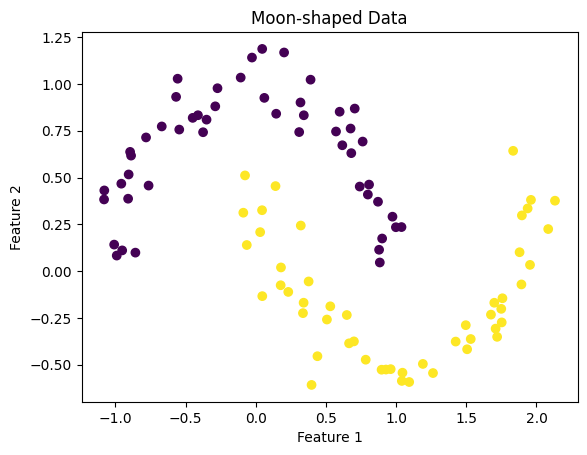

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate moon-shaped data
X, y = make_moons(n_samples=100, noise=0.1)

# Plot the data
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moon-shaped Data")
plt.show()


## SVM Regression


As we mentioned earlier, the SVM algorithm is quite versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear
regression. The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression
tries to fit as many instances as possible on the street while limiting margin violations
(i.e., instances off the street). The width of the street is controlled by a hyperparameter ϵ. Figure shows two linear SVM Regression models trained on some random
linear data, one with a large margin (ϵ = 1.5) and the other with a small margin (ϵ =
0.5)

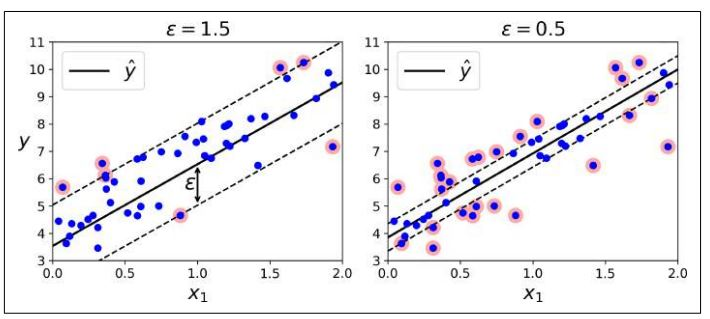

Adding more training instances within the margin does not affect the model’s predictions; thus, the model is said to be ϵ-insensitive.
You can use Scikit-Learn’s LinearSVR class to perform linear SVM Regression. The
following code produces the model represented on the left of above Figure (the training data should be scaled and centered first):


In [7]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

Let's implement this on some random dataset

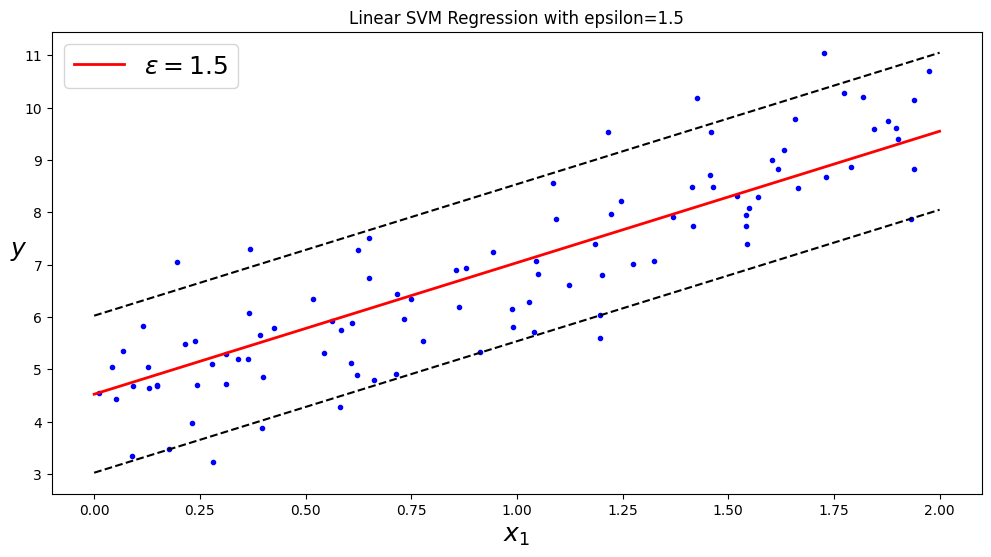

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Generating some random linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear SVM Regression
svm_reg = SVR(kernel="linear", epsilon=1.5)
svm_reg.fit(X_scaled, y.ravel())

# Plotting the linear SVM regression results
plt.figure(figsize=(12, 6))
plt.plot(X, y, "b.")
X_new = np.linspace(0, 2, 100).reshape(100, 1)
X_new_scaled = scaler.transform(X_new)
y_pred = svm_reg.predict(X_new_scaled)
plt.plot(X_new, y_pred, "r-", linewidth=2, label=r"$\epsilon = 1.5$")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper left", fontsize=18)
plt.title("Linear SVM Regression with epsilon=1.5")

# Plotting margins
plt.plot(X_new, y_pred + svm_reg.epsilon, "k--")
plt.plot(X_new, y_pred - svm_reg.epsilon, "k--")

plt.show()


In [9]:
# Displaying the data
print("First 5 rows of X:")
print(X[:5])
print("\nFirst 5 rows of y:")
print(y[:5])

First 5 rows of X:
[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]]

First 5 rows of y:
[[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]]


To tackle **nonlinear regression tasks**, we can use a kernelized SVM model. For example, below Figure shows SVM Regression on a random quadratic training set, using a 2nd-degree polynomial kernel. There is little regularization on the left plot (i.e., a largeC value), and much more regularization on the right plot (i.e., a small C value).

In [10]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, degree=2, kernel='poly')

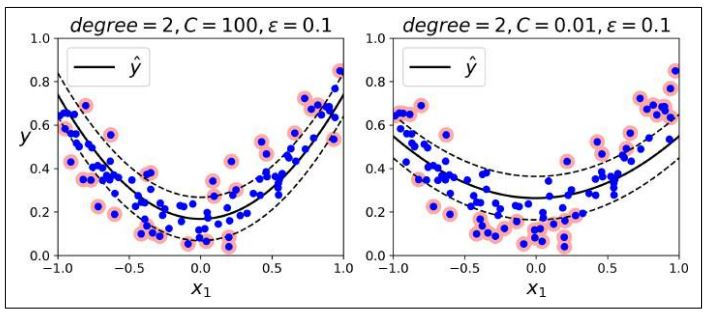

Let's implement this on some random dataset

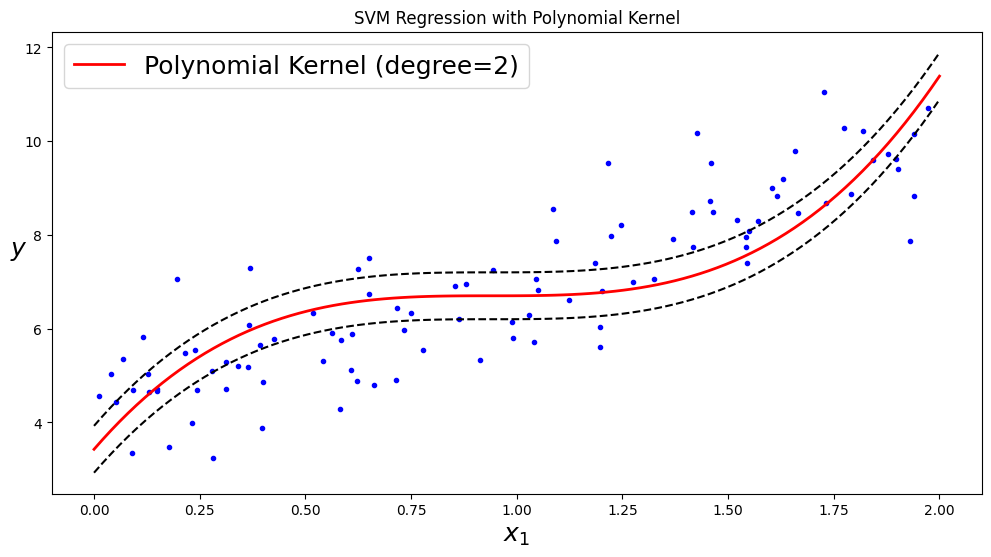

In [11]:
# Nonlinear SVM Regression
svm_poly_reg = SVR(kernel="poly", degree=3, C=100, epsilon=0.5)
svm_poly_reg.fit(X_scaled, y.ravel())

# Plotting the nonlinear SVM regression results
plt.figure(figsize=(12, 6))
plt.plot(X, y, "b.")
y_poly_pred = svm_poly_reg.predict(X_new_scaled)
plt.plot(X_new, y_poly_pred, "r-", linewidth=2, label="Polynomial Kernel (degree=2)")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper left", fontsize=18)
plt.title("SVM Regression with Polynomial Kernel")

# Plotting margins
plt.plot(X_new, y_poly_pred + svm_poly_reg.epsilon, "k--")
plt.plot(X_new, y_poly_pred - svm_poly_reg.epsilon, "k--")

plt.show()
